In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/data.yaml
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/styro_000203.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_001390.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_000129.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/organic_000146.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_001308.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_001414.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/recycle_000842.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/styro_000217.txt
/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset/valid/labels/styro_000052.txt
/kaggle/

# 🌿 EcoSort AI - Professional Waste Classification Training Pipeline

<div align="center">
    
![Python](https://img.shields.io/badge/Python-3.10+-blue?style=for-the-badge&logo=python)
![PyTorch](https://img.shields.io/badge/PyTorch-2.0+-red?style=for-the-badge&logo=pytorch)
![YOLO](https://img.shields.io/badge/YOLO-v8%2Fv11-green?style=for-the-badge)
![License](https://img.shields.io/badge/License-MIT-yellow?style=for-the-badge)

**🎯 Train State-of-the-Art Object Detection Models for Smart Waste Sorting**

</div>

---

## 📋 Table of Contents

1. [📦 Installation & Setup](#1-installation--setup)
2. [📂 Dataset Configuration](#2-dataset-configuration)
3. [📊 Data Exploration & Visualization](#3-data-exploration--visualization)
4. [🚀 Model Training](#4-model-training)
5. [📈 Training Results Visualization](#5-training-results-visualization)
6. [🧪 Model Evaluation & Comparison](#6-model-evaluation--comparison)
7. [🎯 Inference Demo](#7-inference-demo)
8. [🔧 Model Export for Deployment](#8-model-export-for-deployment)
9. [📋 Model Card & Report](#9-model-card--report)
10. [✅ Final Summary](#10-final-summary)

---

## 🎯 Project Overview

| Item | Details |
|------|---------|
| **Task** | Multi-class Object Detection |
| **Dataset** | ~16,600 images, 40 classes, 3 categories |
| **Models** | YOLOv8n, YOLOv8s, YOLO11n |
| **Framework** | Ultralytics YOLO + PyTorch |
| **Hardware** | Kaggle P100 GPU (16GB VRAM) |
| **Goal** | Real-time waste classification for sorting systems |

### 🗂️ Category Distribution

| Category | Classes | Description |
|----------|---------|-------------|
| 🍎 **Organic** | 33 | Biodegradable food waste |
| 🗑️ **Inorganic** | 2 | Non-recyclable waste |
| ♻️ **Recyclable** | 5 | Materials that can be reused |

---

## 📦 1. Installation & Setup

In [2]:
# ============================================================
# 📦 INSTALLATION - Kaggle Compatible (DO NOT MODIFY!)
# ============================================================
# IMPORTANT: Kaggle has specific package versions pre-installed.
# Installing ultralytics may upgrade numpy to 2.x causing conflicts.
# We must downgrade numpy back to 1.x after installing ultralytics.

!pip install ultralytics --quiet
!pip install "numpy<2" --quiet

print("✅ Ultralytics installed successfully!")
print("✅ NumPy downgraded to 1.x for compatibility!")
print("ℹ️  Using Kaggle pre-installed packages (torch, cv2, etc.)")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [3]:
# Import libraries
import os
import glob
import random
import shutil
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

import torch
from ultralytics import YOLO

# Suppress warnings
warnings.filterwarnings('ignore')

# Set style (with fallback for different matplotlib versions)
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")

# Check GPU
print(f"🔥 PyTorch Version: {torch.__version__}")
print(f"🎮 CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"🖥️ GPU: {torch.cuda.get_device_name(0)}")
    print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🔥 PyTorch Version: 2.6.0+cu124
🎮 CUDA Available: True
🖥️ GPU: Tesla P100-PCIE-16GB
💾 GPU Memory: 17.06 GB


## 📂 2. Dataset Configuration

In [4]:
# Dataset paths - Update based on Kaggle input
DATASET_PATH = "/kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset"

# Check dataset structure
print("📁 Dataset Structure:")
for root, dirs, files in os.walk(DATASET_PATH):
    level = root.replace(DATASET_PATH, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    if level < 2:
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:
            print(f"{subindent}{file}")
        if len(files) > 5:
            print(f"{subindent}... and {len(files)-5} more files")

📁 Dataset Structure:
Final_dataset/
  data.yaml
  valid/
    labels/
    images/
  test/
    labels/
    images/
  train/
    labels/
    images/


In [5]:
# Class definitions - 40 classes total (0-39)
CLASS_NAMES = {
    # Organic (0-32) - 33 classes
    0: 'Apple', 1: 'Apple-core', 2: 'Apple-peel', 3: 'Bone', 4: 'Bone-fish',
    5: 'Bread', 6: 'Bun', 7: 'Egg', 8: 'Egg-hard', 9: 'Egg-scramble',
    10: 'Egg-shell', 11: 'Egg-steam', 12: 'Egg-yolk', 13: 'Fish', 14: 'Meat',
    15: 'Mussel', 16: 'Mussel-shell', 17: 'Noodle', 18: 'Orange', 19: 'Orange-peel',
    20: 'Other-waste', 21: 'Pancake', 22: 'Pasta', 23: 'Pear', 24: 'Pear-core',
    25: 'Pear-peel', 26: 'Potato', 27: 'Rice', 28: 'Shrimp', 29: 'Shrimp-shell',
    30: 'Tofu', 31: 'Tomato', 32: 'Vegetable',
    # Inorganic (33-34)
    33: 'plastic_bag', 34: 'styrofoam',
    # Recyclable (35-39)
    35: 'Cardboard', 36: 'Glass', 37: 'Metal', 38: 'Paper', 39: 'Plastic'
}

# Category mapping - 40 classes total
CATEGORIES = {
    'Organic': list(range(0, 33)),      # 33 classes
    'Inorganic': [33, 34],               # 2 classes
    'Recyclable': [35, 36, 37, 38, 39]   # 5 classes
}

CATEGORY_COLORS = {
    'Organic': '#FF6600',
    'Inorganic': '#00FF00', 
    'Recyclable': '#3B82F6'
}

print(f"📊 Total Classes: {len(CLASS_NAMES)}")
for cat, ids in CATEGORIES.items():
    print(f"   {cat}: {len(ids)} classes")

📊 Total Classes: 40
   Organic: 33 classes
   Inorganic: 2 classes
   Recyclable: 5 classes


In [6]:
# Create data.yaml for training
yaml_content = f"""# Waste Classification Dataset
# 40 classes - 3 categories (Organic: 33, Inorganic: 2, Recyclable: 5)

path: {DATASET_PATH}
train: train/images
val: valid/images
test: test/images

nc: 40
names:
"""

for idx, name in CLASS_NAMES.items():
    yaml_content += f"  {idx}: {name}\n"

# Save yaml file
yaml_path = "/kaggle/working/data.yaml"
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"✅ Created {yaml_path}")
print("\n" + yaml_content[:500] + "...")

✅ Created /kaggle/working/data.yaml

# Waste Classification Dataset
# 40 classes - 3 categories (Organic: 33, Inorganic: 2, Recyclable: 5)

path: /kaggle/input/waste-organic-inorganic-reclycable-yolov8/Final_dataset
train: train/images
val: valid/images
test: test/images

nc: 40
names:
  0: Apple
  1: Apple-core
  2: Apple-peel
  3: Bone
  4: Bone-fish
  5: Bread
  6: Bun
  7: Egg
  8: Egg-hard
  9: Egg-scramble
  10: Egg-shell
  11: Egg-steam
  12: Egg-yolk
  13: Fish
  14: Meat
  15: Mussel
  16: Mussel-shell
  17: Noodle
  18: O...


## 📊 3. Data Exploration & Visualization

📊 Dataset Split Statistics:
   Train: 13,447 images
   Valid: 2,181 images
   Test:  1,018 images
   Total: 16,646 images


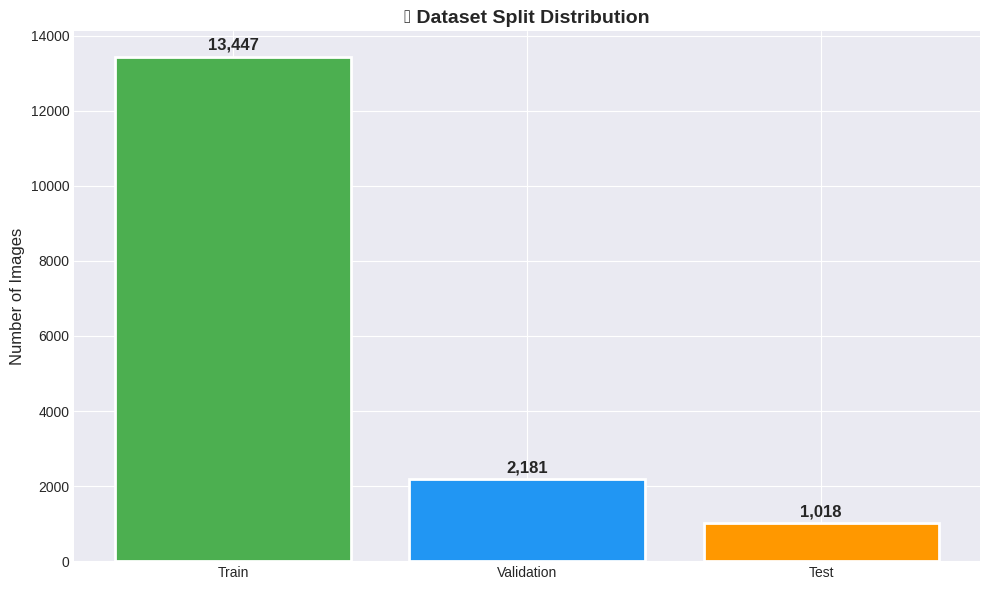

In [7]:
# Count images in each split
def count_images(path):
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp']
    count = 0
    for ext in extensions:
        count += len(glob.glob(os.path.join(path, ext)))
    return count

train_count = count_images(f"{DATASET_PATH}/train/images")
valid_count = count_images(f"{DATASET_PATH}/valid/images")
test_count = count_images(f"{DATASET_PATH}/test/images")

print("📊 Dataset Split Statistics:")
print(f"   Train: {train_count:,} images")
print(f"   Valid: {valid_count:,} images")
print(f"   Test:  {test_count:,} images")
print(f"   Total: {train_count + valid_count + test_count:,} images")

# Visualize split distribution
fig, ax = plt.subplots(figsize=(10, 6))
splits = ['Train', 'Validation', 'Test']
counts = [train_count, valid_count, test_count]
colors = ['#4CAF50', '#2196F3', '#FF9800']

bars = ax.bar(splits, counts, color=colors, edgecolor='white', linewidth=2)
ax.set_ylabel('Number of Images', fontsize=12)
ax.set_title('📊 Dataset Split Distribution', fontsize=14, fontweight='bold')

for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
            f'{count:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('/kaggle/working/split_distribution.png', dpi=150)
plt.show()

In [8]:
# Analyze class distribution from labels
def analyze_class_distribution(labels_path):
    class_counts = {i: 0 for i in range(40)}
    label_files = glob.glob(f"{labels_path}/*.txt")
    
    for label_file in label_files:
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if parts:
                    class_id = int(parts[0])
                    if class_id in class_counts:
                        class_counts[class_id] += 1
    return class_counts

print("🔍 Analyzing class distribution...")
train_class_dist = analyze_class_distribution(f"{DATASET_PATH}/train/labels")

# Create DataFrame
df_dist = pd.DataFrame([
    {'Class ID': k, 'Class Name': CLASS_NAMES.get(k, f'Unknown_{k}'), 'Count': v}
    for k, v in train_class_dist.items() if v > 0
])
df_dist = df_dist.sort_values('Count', ascending=False)

print(f"\n📊 Classes with annotations: {len(df_dist)}")
print(f"📊 Total annotations: {df_dist['Count'].sum():,}")
print("\n🔝 Top 10 Classes:")
print(df_dist.head(10).to_string(index=False))

🔍 Analyzing class distribution...

📊 Classes with annotations: 39
📊 Total annotations: 35,976

🔝 Top 10 Classes:
 Class ID   Class Name  Count
        3         Bone   4257
       31       Tomato   4038
        9 Egg-scramble   3670
       17       Noodle   2456
       18       Orange   2117
       33  plastic_bag   1838
        2   Apple-peel   1533
       38        Paper   1330
        0        Apple   1317
       34    styrofoam   1250


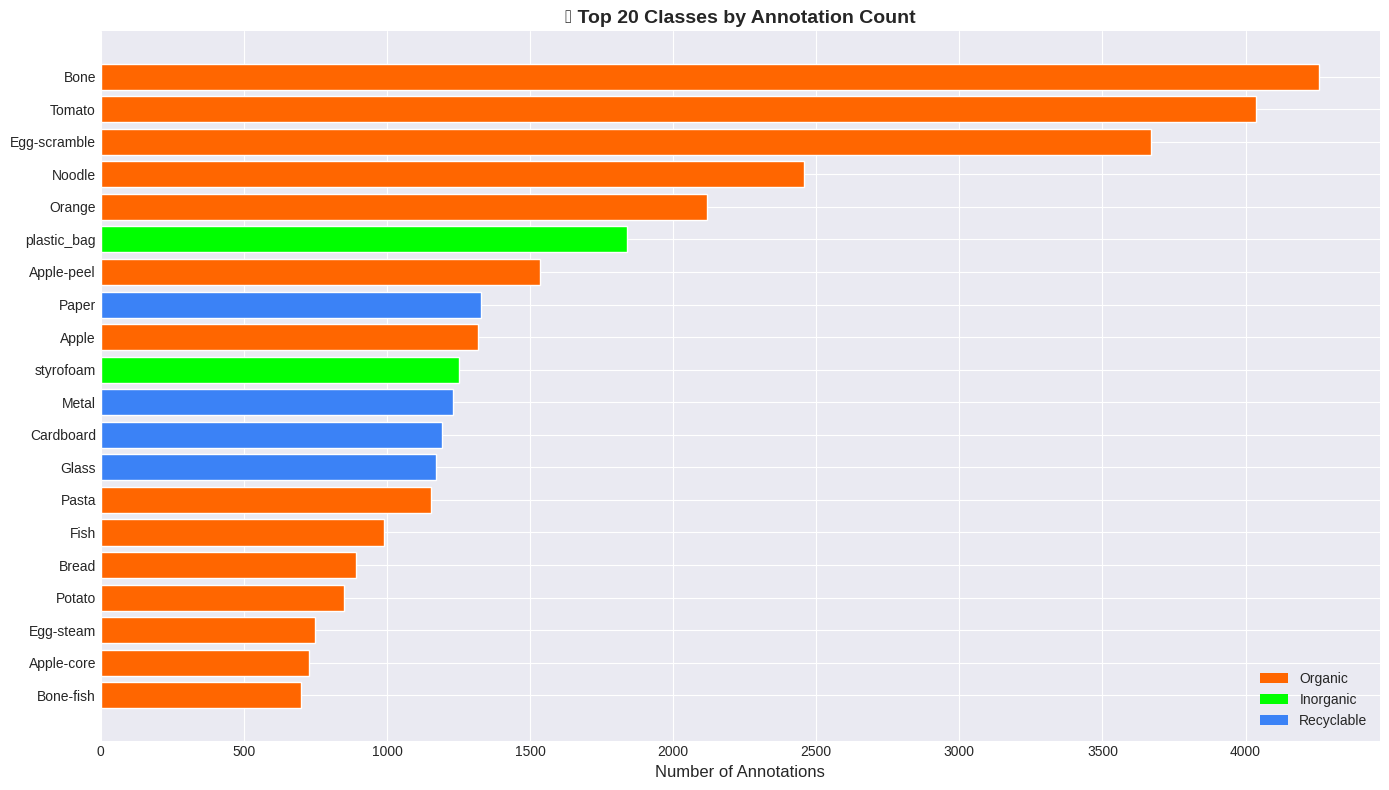

In [9]:
# Visualize class distribution (Top 20)
fig, ax = plt.subplots(figsize=(14, 8))

top_20 = df_dist.head(20)

# Color by category
def get_category_color(class_id):
    for cat, ids in CATEGORIES.items():
        if class_id in ids:
            return CATEGORY_COLORS[cat]
    return '#888888'

colors = [get_category_color(row['Class ID']) for _, row in top_20.iterrows()]

bars = ax.barh(top_20['Class Name'], top_20['Count'], color=colors, edgecolor='white')
ax.set_xlabel('Number of Annotations', fontsize=12)
ax.set_title('🏆 Top 20 Classes by Annotation Count', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=cat) for cat, color in CATEGORY_COLORS.items()]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('/kaggle/working/class_distribution.png', dpi=150)
plt.show()

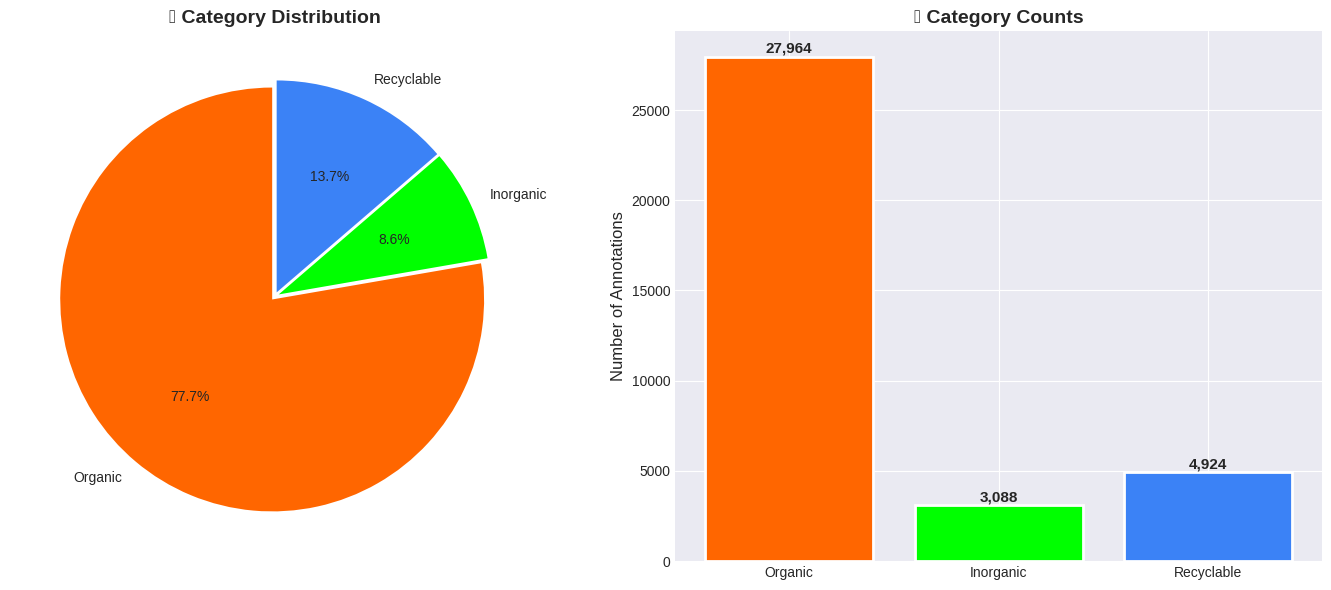


📊 Category Statistics:
   Organic: 27,964 annotations (77.7%)
   Inorganic: 3,088 annotations (8.6%)
   Recyclable: 4,924 annotations (13.7%)


In [10]:
# Category distribution pie chart
category_counts = {}
for cat, ids in CATEGORIES.items():
    category_counts[cat] = sum(train_class_dist.get(i, 0) for i in ids)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = [CATEGORY_COLORS[cat] for cat in category_counts.keys()]
wedges, texts, autotexts = axes[0].pie(
    category_counts.values(), 
    labels=category_counts.keys(),
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.02, 0.02, 0.02)
)
axes[0].set_title('🥧 Category Distribution', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(category_counts.keys(), category_counts.values(), color=colors, edgecolor='white', linewidth=2)
axes[1].set_ylabel('Number of Annotations', fontsize=12)
axes[1].set_title('📊 Category Counts', fontsize=14, fontweight='bold')

for bar, count in zip(bars, category_counts.values()):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                 f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/kaggle/working/category_distribution.png', dpi=150)
plt.show()

print("\n📊 Category Statistics:")
for cat, count in category_counts.items():
    print(f"   {cat}: {count:,} annotations ({count/sum(category_counts.values())*100:.1f}%)")

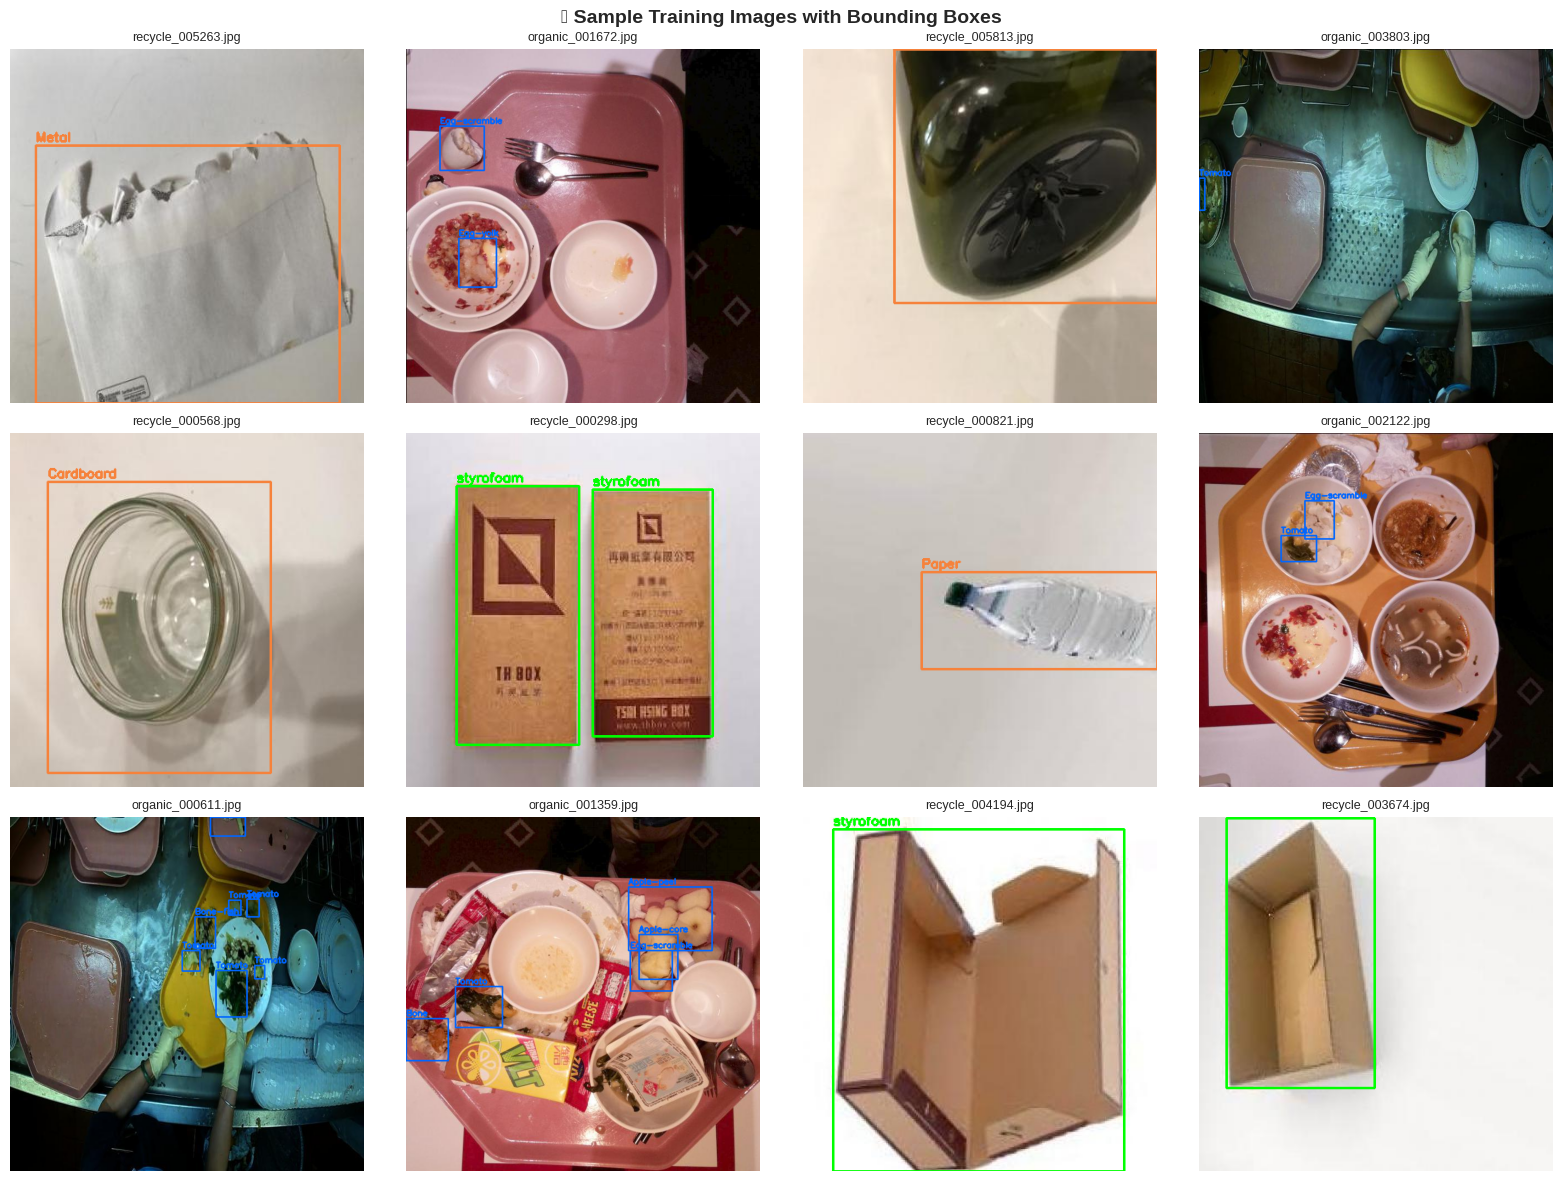

In [11]:
# Visualize sample images with bounding boxes
def draw_bbox(img, label_path, class_names):
    img_h, img_w = img.shape[:2]
    
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center, y_center, w, h = map(float, parts[1:5])
                    
                    # Convert to pixel coordinates
                    x1 = int((x_center - w/2) * img_w)
                    y1 = int((y_center - h/2) * img_h)
                    x2 = int((x_center + w/2) * img_w)
                    y2 = int((y_center + h/2) * img_h)
                    
                    # Get color
                    color = (0, 255, 0)  # Default green
                    for cat, ids in CATEGORIES.items():
                        if class_id in ids:
                            hex_color = CATEGORY_COLORS[cat]
                            color = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
                            color = (color[2], color[1], color[0])  # BGR
                            break
                    
                    # Draw
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                    label = class_names.get(class_id, f'Class_{class_id}')
                    cv2.putText(img, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    return img

# Show sample images
train_images = glob.glob(f"{DATASET_PATH}/train/images/*.jpg")[:12]

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, img_path in enumerate(train_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    label_path = img_path.replace('/images/', '/labels/').replace('.jpg', '.txt').replace('.png', '.txt')
    img = draw_bbox(img, label_path, CLASS_NAMES)
    
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(os.path.basename(img_path)[:20], fontsize=9)

plt.suptitle('📸 Sample Training Images with Bounding Boxes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/kaggle/working/sample_images.png', dpi=150)
plt.show()

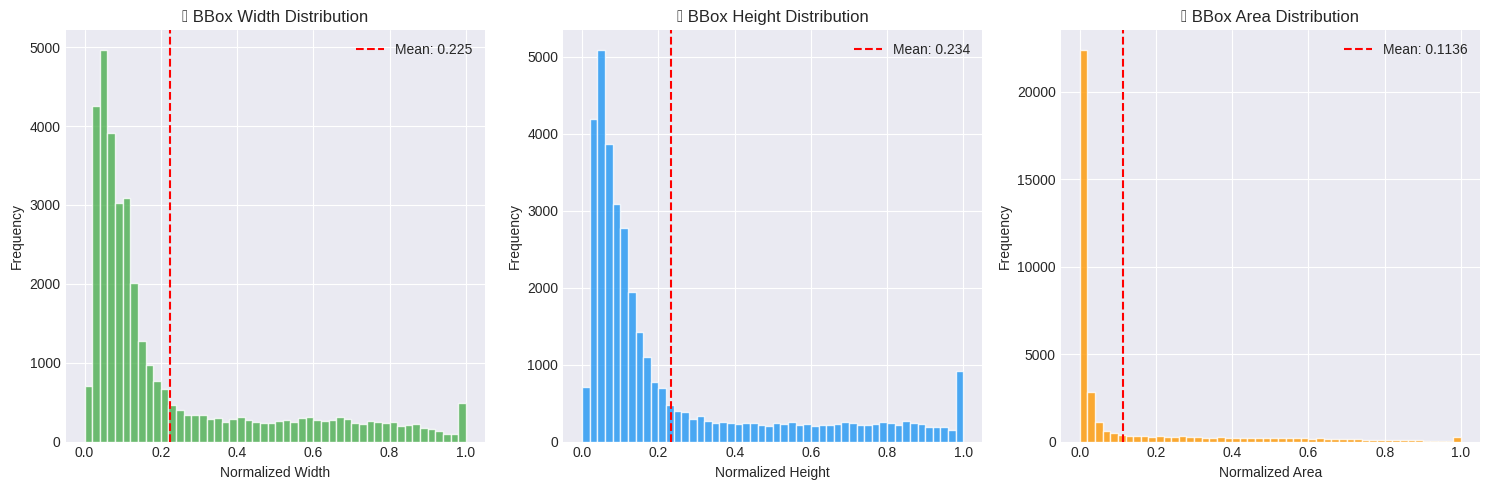


📊 BBox Statistics:
   Width  - Mean: 0.2247, Std: 0.2554
   Height - Mean: 0.2338, Std: 0.2729
   Area   - Mean: 0.1136, Std: 0.2162


In [12]:
# Analyze bounding box sizes
def analyze_bbox_sizes(labels_path):
    widths, heights, areas = [], [], []
    label_files = glob.glob(f"{labels_path}/*.txt")
    
    for label_file in label_files:
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    w, h = float(parts[3]), float(parts[4])
                    widths.append(w)
                    heights.append(h)
                    areas.append(w * h)
    
    return widths, heights, areas

widths, heights, areas = analyze_bbox_sizes(f"{DATASET_PATH}/train/labels")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Width distribution
axes[0].hist(widths, bins=50, color='#4CAF50', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Normalized Width')
axes[0].set_ylabel('Frequency')
axes[0].set_title('📐 BBox Width Distribution')
axes[0].axvline(np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.3f}')
axes[0].legend()

# Height distribution
axes[1].hist(heights, bins=50, color='#2196F3', edgecolor='white', alpha=0.8)
axes[1].set_xlabel('Normalized Height')
axes[1].set_ylabel('Frequency')
axes[1].set_title('📏 BBox Height Distribution')
axes[1].axvline(np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.3f}')
axes[1].legend()

# Area distribution
axes[2].hist(areas, bins=50, color='#FF9800', edgecolor='white', alpha=0.8)
axes[2].set_xlabel('Normalized Area')
axes[2].set_ylabel('Frequency')
axes[2].set_title('📦 BBox Area Distribution')
axes[2].axvline(np.mean(areas), color='red', linestyle='--', label=f'Mean: {np.mean(areas):.4f}')
axes[2].legend()

plt.tight_layout()
plt.savefig('/kaggle/working/bbox_analysis.png', dpi=150)
plt.show()

print(f"\n📊 BBox Statistics:")
print(f"   Width  - Mean: {np.mean(widths):.4f}, Std: {np.std(widths):.4f}")
print(f"   Height - Mean: {np.mean(heights):.4f}, Std: {np.std(heights):.4f}")
print(f"   Area   - Mean: {np.mean(areas):.4f}, Std: {np.std(areas):.4f}")

## 🚀 4. Model Training

Train 3 different models:
1. **YOLOv8n** - Nano (fastest, for real-time on edge devices)
2. **YOLOv8s** - Small (balanced speed/accuracy)
3. **YOLO11n** - Latest architecture

In [13]:
# Training configuration
TRAIN_CONFIG = {
    'data': '/kaggle/working/data.yaml',
    'epochs': 100,
    'imgsz': 640,
    'batch': 16,  # Adjust based on GPU memory
    'patience': 20,  # Early stopping
    'device': 0,  # GPU
    'workers': 4,
    'optimizer': 'AdamW',
    'lr0': 0.001,
    'lrf': 0.01,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3,
    'warmup_momentum': 0.8,
    'warmup_bias_lr': 0.1,
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'degrees': 10.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 2.0,
    'flipud': 0.5,
    'fliplr': 0.5,
    'mosaic': 1.0,
    'mixup': 0.1,
    'copy_paste': 0.1,
    'save': True,
    'save_period': 10,
    'cache': True,
    'exist_ok': True,
    'pretrained': True,
    'verbose': True
}

print("⚙️ Training Configuration:")
for key, value in list(TRAIN_CONFIG.items())[:10]:
    print(f"   {key}: {value}")
print("   ...")

⚙️ Training Configuration:
   data: /kaggle/working/data.yaml
   epochs: 100
   imgsz: 640
   batch: 16
   patience: 20
   device: 0
   workers: 4
   optimizer: AdamW
   lr0: 0.001
   lrf: 0.01
   ...


In [14]:
# Train YOLOv8n (Nano)
print("="*60)
print("🚀 Training Model 1: YOLOv8n (Nano)")
print("="*60)

model_v8n = YOLO('yolov8n.pt')
results_v8n = model_v8n.train(
    **TRAIN_CONFIG,
    name='yolov8n_waste',
    project='/kaggle/working/runs'
)

print("\n✅ YOLOv8n training completed!")

🚀 Training Model 1: YOLOv8n (Nano)
Ultralytics 8.3.234 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_waste, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True

In [15]:
# Train YOLOv8s (Small)
print("="*60)
print("🚀 Training Model 2: YOLOv8s (Small)")
print("="*60)

model_v8s = YOLO('yolov8s.pt')
results_v8s = model_v8s.train(
    **TRAIN_CONFIG,
    name='yolov8s_waste',
    project='/kaggle/working/runs'
)

print("\n✅ YOLOv8s training completed!")

🚀 Training Model 2: YOLOv8s (Small)
Ultralytics 8.3.234 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_waste, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=Tru

In [ ]:
# Train YOLO11n (Latest)
print("="*60)
print("🚀 Training Model 3: YOLO11n (Latest Architecture)")
print("="*60)

model_11n = YOLO('yolo11n.pt')
results_11n = model_11n.train(
    **TRAIN_CONFIG,
    name='yolo11n_waste',
    project='/kaggle/working/runs'
)

print("\n✅ YOLO11n training completed!")

## 📈 5. Training Results Visualization

In [ ]:
# Load training results
def load_results(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()
    return df

results_paths = {
    'YOLOv8n': '/kaggle/working/runs/yolov8n_waste/results.csv',
    'YOLOv8s': '/kaggle/working/runs/yolov8s_waste/results.csv',
    'YOLO11n': '/kaggle/working/runs/yolo11n_waste/results.csv'
}

all_results = {}
for name, path in results_paths.items():
    if os.path.exists(path):
        all_results[name] = load_results(path)
        print(f"✅ Loaded {name} results: {len(all_results[name])} epochs")
    else:
        print(f"❌ {name} results not found")

In [ ]:
# Plot training curves comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics = [
    ('train/box_loss', 'Train Box Loss'),
    ('train/cls_loss', 'Train Classification Loss'),
    ('train/dfl_loss', 'Train DFL Loss'),
    ('metrics/precision(B)', 'Precision'),
    ('metrics/recall(B)', 'Recall'),
    ('metrics/mAP50-95(B)', 'mAP50-95')
]

colors = {'YOLOv8n': '#4CAF50', 'YOLOv8s': '#2196F3', 'YOLO11n': '#FF9800'}

for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    
    for model_name, df in all_results.items():
        if metric in df.columns:
            ax.plot(df['epoch'], df[metric], label=model_name, color=colors[model_name], linewidth=2)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel(title)
    ax.set_title(f'📈 {title}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('🔥 Training Curves Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('/kaggle/working/training_curves.png', dpi=150)
plt.show()

## 🧪 6. Model Evaluation & Comparison

In [ ]:
# Load best models
model_paths = {
    'YOLOv8n': '/kaggle/working/runs/yolov8n_waste/weights/best.pt',
    'YOLOv8s': '/kaggle/working/runs/yolov8s_waste/weights/best.pt',
    'YOLO11n': '/kaggle/working/runs/yolo11n_waste/weights/best.pt'
}

best_models = {}
for name, path in model_paths.items():
    if os.path.exists(path):
        best_models[name] = YOLO(path)
        print(f"✅ Loaded {name} best model")
    else:
        print(f"❌ {name} model not found")

In [ ]:
# Evaluate all models on test set
evaluation_results = {}

for name, model in best_models.items():
    print(f"\n{'='*60}")
    print(f"📊 Evaluating {name} on Test Set")
    print(f"{'='*60}")
    
    metrics = model.val(
        data='/kaggle/working/data.yaml',
        split='test',
        verbose=True
    )
    
    evaluation_results[name] = {
        'mAP50': metrics.box.map50,
        'mAP50-95': metrics.box.map,
        'Precision': metrics.box.mp,
        'Recall': metrics.box.mr,
        'F1': 2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr + 1e-6)
    }
    
    print(f"\n📈 {name} Results:")
    for metric, value in evaluation_results[name].items():
        print(f"   {metric}: {value:.4f}")

In [ ]:
# Speed benchmark
import time

speed_results = {}
test_images = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")[:100]

for name, model in best_models.items():
    print(f"\n⏱️ Benchmarking {name}...")
    
    # Warmup
    for _ in range(5):
        _ = model.predict(test_images[0], verbose=False)
    
    # Benchmark
    start = time.time()
    for img in test_images:
        _ = model.predict(img, verbose=False)
    end = time.time()
    
    avg_time = (end - start) / len(test_images) * 1000  # ms
    fps = 1000 / avg_time
    
    speed_results[name] = {
        'Inference Time (ms)': avg_time,
        'FPS': fps
    }
    
    print(f"   Avg Time: {avg_time:.2f}ms | FPS: {fps:.1f}")

In [ ]:
# ============================================================
# 📊 CONFUSION MATRIX & PER-CLASS ANALYSIS
# ============================================================

def plot_confusion_matrix_analysis(model, model_name, data_yaml):
    """Generate detailed confusion matrix and per-class metrics"""
    
    print(f"\n{'='*60}")
    print(f"📊 Detailed Analysis for {model_name}")
    print(f"{'='*60}")
    
    # Run validation to get confusion matrix
    metrics = model.val(data=data_yaml, split='test', plots=True, verbose=False)
    
    # Get per-class metrics
    if hasattr(metrics.box, 'ap_class_index') and hasattr(metrics.box, 'ap'):
        class_indices = metrics.box.ap_class_index
        class_aps = metrics.box.ap50  # AP at IoU=0.5
        
        # Create per-class DataFrame
        per_class_data = []
        for idx, ap in zip(class_indices, class_aps):
            class_name = CLASS_NAMES.get(int(idx), f'Class_{idx}')
            category = 'Unknown'
            for cat, ids in CATEGORIES.items():
                if int(idx) in ids:
                    category = cat
                    break
            per_class_data.append({
                'Class ID': int(idx),
                'Class Name': class_name,
                'Category': category,
                'AP@50': ap
            })
        
        per_class_df = pd.DataFrame(per_class_data)
        per_class_df = per_class_df.sort_values('AP@50', ascending=False)
        
        print(f"\n🔝 Top 10 Best Performing Classes:")
        print(per_class_df.head(10).to_string(index=False))
        
        print(f"\n⚠️ Bottom 10 Classes (Need Improvement):")
        print(per_class_df.tail(10).to_string(index=False))
        
        # Visualize per-class AP
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Top 15 classes
        top_15 = per_class_df.head(15)
        colors = [CATEGORY_COLORS.get(cat, '#888') for cat in top_15['Category']]
        axes[0].barh(top_15['Class Name'], top_15['AP@50'], color=colors)
        axes[0].set_xlabel('AP@50')
        axes[0].set_title(f'🏆 Top 15 Classes - {model_name}', fontweight='bold')
        axes[0].invert_yaxis()
        axes[0].set_xlim(0, 1)
        
        # Bottom 15 classes
        bottom_15 = per_class_df.tail(15)
        colors = [CATEGORY_COLORS.get(cat, '#888') for cat in bottom_15['Category']]
        axes[1].barh(bottom_15['Class Name'], bottom_15['AP@50'], color=colors)
        axes[1].set_xlabel('AP@50')
        axes[1].set_title(f'⚠️ Bottom 15 Classes - {model_name}', fontweight='bold')
        axes[1].invert_yaxis()
        axes[1].set_xlim(0, 1)
        
        plt.tight_layout()
        plt.savefig(f'/kaggle/working/per_class_analysis_{model_name.lower().replace(" ", "_")}.png', dpi=150)
        plt.show()
        
        # Category-level summary
        print(f"\n📊 Category-level Performance:")
        category_summary = per_class_df.groupby('Category')['AP@50'].agg(['mean', 'std', 'min', 'max'])
        print(category_summary.round(4).to_string())
        
        return per_class_df
    
    return None

# Analyze best model
best_model_name = list(best_models.keys())[0]  # Will be updated after comparison
per_class_results = {}

for name, model in best_models.items():
    per_class_results[name] = plot_confusion_matrix_analysis(
        model, name, '/kaggle/working/data.yaml'
    )

In [ ]:
# Create comparison table
comparison_df = pd.DataFrame()

for name in best_models.keys():
    row = {
        'Model': name,
        **evaluation_results.get(name, {}),
        **speed_results.get(name, {})
    }
    comparison_df = pd.concat([comparison_df, pd.DataFrame([row])], ignore_index=True)

# Calculate overall score (weighted)
comparison_df['Overall Score'] = (
    comparison_df['mAP50-95'] * 0.4 +
    comparison_df['F1'] * 0.3 +
    (comparison_df['FPS'] / comparison_df['FPS'].max()) * 0.3
)

comparison_df = comparison_df.sort_values('Overall Score', ascending=False)

print("\n" + "="*80)
print("🏆 MODEL COMPARISON RESULTS")
print("="*80)
print(comparison_df.to_string(index=False))

# Save comparison
comparison_df.to_csv('/kaggle/working/model_comparison.csv', index=False)

In [ ]:
# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# mAP comparison
x = np.arange(len(comparison_df))
width = 0.35

axes[0].bar(x - width/2, comparison_df['mAP50'], width, label='mAP50', color='#4CAF50')
axes[0].bar(x + width/2, comparison_df['mAP50-95'], width, label='mAP50-95', color='#2196F3')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'])
axes[0].set_ylabel('mAP Score')
axes[0].set_title('📊 mAP Comparison', fontweight='bold')
axes[0].legend()
axes[0].set_ylim(0, 1)

# Speed comparison
colors = ['#4CAF50', '#2196F3', '#FF9800']
bars = axes[1].bar(comparison_df['Model'], comparison_df['FPS'], color=colors[:len(comparison_df)])
axes[1].set_ylabel('FPS')
axes[1].set_title('⚡ Speed Comparison (FPS)', fontweight='bold')
for bar, fps in zip(bars, comparison_df['FPS']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{fps:.1f}', ha='center', fontweight='bold')

# Overall score
bars = axes[2].bar(comparison_df['Model'], comparison_df['Overall Score'], color=colors[:len(comparison_df)])
axes[2].set_ylabel('Overall Score')
axes[2].set_title('🏆 Overall Score', fontweight='bold')
axes[2].set_ylim(0, 1)
for bar, score in zip(bars, comparison_df['Overall Score']):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{score:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/kaggle/working/model_comparison.png', dpi=150)
plt.show()

In [ ]:
# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = best_models[best_model_name]
best_model_path = model_paths[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Path: {best_model_path}")
print(f"   mAP50: {comparison_df.iloc[0]['mAP50']:.4f}")
print(f"   mAP50-95: {comparison_df.iloc[0]['mAP50-95']:.4f}")
print(f"   F1 Score: {comparison_df.iloc[0]['F1']:.4f}")
print(f"   FPS: {comparison_df.iloc[0]['FPS']:.1f}")

## 🎯 7. Inference Demo

In [ ]:
# Test inference on sample images
test_samples = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")[:8]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, img_path in enumerate(test_samples):
    # Run inference
    results = best_model.predict(img_path, conf=0.25, verbose=False)
    
    # Get annotated image
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    
    axes[idx].imshow(annotated_img)
    axes[idx].axis('off')
    
    # Count detections
    n_detections = len(results[0].boxes)
    axes[idx].set_title(f'{n_detections} detections', fontsize=10)

plt.suptitle(f'🎯 Inference Results - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/kaggle/working/inference_demo.png', dpi=150)
plt.show()

In [ ]:
# ============================================================
# 🔍 ERROR ANALYSIS - Find Difficult Cases
# ============================================================

print("\n" + "="*60)
print("🔍 ERROR ANALYSIS - Identifying Difficult Cases")
print("="*60)

def analyze_detection_errors(model, test_images, labels_path, conf_threshold=0.25):
    """Analyze false positives, false negatives, and low confidence detections"""
    
    results_analysis = {
        'high_confidence': [],  # > 0.8
        'medium_confidence': [],  # 0.5 - 0.8
        'low_confidence': [],  # 0.25 - 0.5
        'no_detection': [],  # Images with no detections
        'multi_category': []  # Images with multiple categories
    }
    
    for img_path in test_images[:200]:  # Analyze 200 images
        results = model.predict(img_path, conf=conf_threshold, verbose=False)
        
        if len(results[0].boxes) == 0:
            results_analysis['no_detection'].append(img_path)
        else:
            confs = results[0].boxes.conf.cpu().numpy()
            classes = results[0].boxes.cls.cpu().numpy()
            
            # Categorize by confidence
            avg_conf = np.mean(confs)
            if avg_conf > 0.8:
                results_analysis['high_confidence'].append((img_path, avg_conf))
            elif avg_conf > 0.5:
                results_analysis['medium_confidence'].append((img_path, avg_conf))
            else:
                results_analysis['low_confidence'].append((img_path, avg_conf))
            
            # Check for multi-category
            categories_found = set()
            for cls in classes:
                for cat, ids in CATEGORIES.items():
                    if int(cls) in ids:
                        categories_found.add(cat)
            if len(categories_found) > 1:
                results_analysis['multi_category'].append((img_path, list(categories_found)))
    
    return results_analysis

test_images = glob.glob(f"{DATASET_PATH}/test/images/*.jpg")
error_analysis = analyze_detection_errors(best_model, test_images, f"{DATASET_PATH}/test/labels")

print(f"\n📊 Detection Confidence Distribution (200 samples):")
print(f"   🟢 High Confidence (>80%): {len(error_analysis['high_confidence'])} images")
print(f"   🟡 Medium Confidence (50-80%): {len(error_analysis['medium_confidence'])} images")
print(f"   🔴 Low Confidence (25-50%): {len(error_analysis['low_confidence'])} images")
print(f"   ⚫ No Detection: {len(error_analysis['no_detection'])} images")
print(f"   🔀 Multi-Category: {len(error_analysis['multi_category'])} images")

# Visualize difficult cases
if error_analysis['low_confidence']:
    print("\n⚠️ Showing Low Confidence Detection Examples:")
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    
    for idx, (img_path, conf) in enumerate(error_analysis['low_confidence'][:4]):
        results = best_model.predict(img_path, conf=0.25, verbose=False)
        annotated_img = results[0].plot()
        annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
        
        axes[idx].imshow(annotated_img)
        axes[idx].axis('off')
        axes[idx].set_title(f'Avg Conf: {conf:.2f}', fontsize=10, color='red')
    
    plt.suptitle('⚠️ Low Confidence Detections (Need Improvement)', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig('/kaggle/working/low_confidence_cases.png', dpi=150)
    plt.show()

In [ ]:
# ============================================================
# 🎬 VIDEO INFERENCE TEST (Simulated)
# ============================================================

print("\n" + "="*60)
print("🎬 VIDEO/STREAMING INFERENCE SIMULATION")
print("="*60)

def simulate_video_inference(model, images, fps_target=30):
    """Simulate real-time video inference to test streaming capability"""
    
    print(f"\n🎥 Simulating video stream at {fps_target} FPS target...")
    
    inference_times = []
    frame_count = 0
    
    # Process frames
    for img_path in images[:60]:  # Simulate 60 frames (2 seconds at 30fps)
        start = time.time()
        results = model.predict(img_path, conf=0.25, verbose=False)
        end = time.time()
        
        inference_times.append((end - start) * 1000)  # Convert to ms
        frame_count += 1
    
    avg_time = np.mean(inference_times)
    actual_fps = 1000 / avg_time
    std_time = np.std(inference_times)
    
    print(f"\n📊 Streaming Performance Results:")
    print(f"   • Frames Processed: {frame_count}")
    print(f"   • Average Inference Time: {avg_time:.2f}ms (±{std_time:.2f}ms)")
    print(f"   • Achieved FPS: {actual_fps:.1f}")
    print(f"   • Target FPS: {fps_target}")
    
    if actual_fps >= fps_target:
        print(f"   ✅ PASS - Model can handle real-time streaming!")
    elif actual_fps >= fps_target * 0.8:
        print(f"   🟡 ACCEPTABLE - Close to real-time ({actual_fps/fps_target*100:.1f}% of target)")
    else:
        print(f"   🔴 BELOW TARGET - Consider using lighter model for streaming")
    
    # Visualize latency distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Latency histogram
    axes[0].hist(inference_times, bins=20, color='#4CAF50', edgecolor='white', alpha=0.8)
    axes[0].axvline(avg_time, color='red', linestyle='--', label=f'Mean: {avg_time:.1f}ms')
    axes[0].axvline(1000/fps_target, color='blue', linestyle='--', label=f'Target: {1000/fps_target:.1f}ms')
    axes[0].set_xlabel('Inference Time (ms)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('⏱️ Inference Latency Distribution', fontweight='bold')
    axes[0].legend()
    
    # Latency over time
    axes[1].plot(inference_times, color='#2196F3', linewidth=1)
    axes[1].axhline(avg_time, color='red', linestyle='--', label=f'Mean: {avg_time:.1f}ms')
    axes[1].axhline(1000/fps_target, color='green', linestyle='--', label=f'30 FPS threshold')
    axes[1].set_xlabel('Frame Number')
    axes[1].set_ylabel('Inference Time (ms)')
    axes[1].set_title('📈 Inference Time per Frame', fontweight='bold')
    axes[1].legend()
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/streaming_performance.png', dpi=150)
    plt.show()
    
    return {
        'avg_time_ms': avg_time,
        'fps': actual_fps,
        'std_ms': std_time
    }

# Run simulation
streaming_results = simulate_video_inference(best_model, test_images, fps_target=30)

## 🔧 8. Model Export for Deployment

In [ ]:
# Export best model to various formats
print("📦 Exporting best model to multiple formats...\n")

export_dir = '/kaggle/working/exported_models'
os.makedirs(export_dir, exist_ok=True)

# 1. ONNX (for cross-platform deployment)
print("1️⃣ Exporting to ONNX...")
best_model.export(format='onnx', dynamic=True, simplify=True)
print("   ✅ ONNX export complete")

# 2. TorchScript (for PyTorch deployment)
print("\n2️⃣ Exporting to TorchScript...")
best_model.export(format='torchscript')
print("   ✅ TorchScript export complete")

# 3. TensorRT (for NVIDIA GPU optimization) - Optional
try:
    print("\n3️⃣ Exporting to TensorRT...")
    best_model.export(format='engine', half=True)
    print("   ✅ TensorRT export complete")
except Exception as e:
    print(f"   ⚠️ TensorRT export skipped: {e}")

print("\n✅ All exports completed!")

In [ ]:
# Copy best model to output
shutil.copy(best_model_path, '/kaggle/working/best_model.pt')

# List exported files
print("📁 Exported Files:")
for f in glob.glob('/kaggle/working/runs/**/*', recursive=True):
    if os.path.isfile(f) and f.endswith(('.pt', '.onnx', '.torchscript', '.engine')):
        size = os.path.getsize(f) / 1024 / 1024
        print(f"   {os.path.basename(f)}: {size:.2f} MB")

## 📋 9. Generate Model Card & Report

In [ ]:
# Generate comprehensive model report
report = f"""
# 🌿 EcoSort AI - Waste Classification Model Report

## 📊 Training Summary
- **Dataset**: Waste_organic_inorganic_recyclable
- **Total Images**: {train_count + valid_count + test_count:,}
- **Classes**: 40 (Organic: 33, Inorganic: 2, Recyclable: 5)
- **Training Epochs**: {TRAIN_CONFIG['epochs']}
- **Image Size**: {TRAIN_CONFIG['imgsz']}x{TRAIN_CONFIG['imgsz']}

## 🏆 Best Model: {best_model_name}

### Performance Metrics
| Metric | Value |
|--------|-------|
| mAP@50 | {comparison_df.iloc[0]['mAP50']:.4f} |
| mAP@50-95 | {comparison_df.iloc[0]['mAP50-95']:.4f} |
| Precision | {comparison_df.iloc[0]['Precision']:.4f} |
| Recall | {comparison_df.iloc[0]['Recall']:.4f} |
| F1 Score | {comparison_df.iloc[0]['F1']:.4f} |
| Inference Speed | {comparison_df.iloc[0]['FPS']:.1f} FPS |

### Model Comparison

{comparison_df.to_markdown(index=False)}

## 🎯 Recommended Use Cases

1. **Real-time Camera Detection**: FPS > 30 suitable for live streaming
2. **Image Upload**: High accuracy for single image analysis
3. **Video Processing**: Batch processing of video files
4. **Edge Deployment**: ONNX/TensorRT for embedded systems

## 📁 Output Files

- `best_model.pt` - PyTorch model (recommended)
- `best_model.onnx` - ONNX format for cross-platform
- `best_model.torchscript` - TorchScript for production
- `model_comparison.csv` - Detailed comparison results

## 🚀 Quick Start

```python
from ultralytics import YOLO

# Load model
model = YOLO('best_model.pt')

# Image inference
results = model.predict('image.jpg', conf=0.25)

# Video inference
results = model.predict('video.mp4', stream=True)

# Camera inference
results = model.predict(source=0, stream=True)  # webcam
```

---
Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

with open('/kaggle/working/MODEL_REPORT.md', 'w') as f:
    f.write(report)

print(report)

## ✅ 10. Final Summary

In [ ]:
# Final summary
print("="*70)
print("🎉 TRAINING COMPLETED SUCCESSFULLY!")
print("="*70)

print(f"\n📊 Models Trained: 3")
print(f"🏆 Best Model: {best_model_name}")
print(f"📈 Best mAP50-95: {comparison_df.iloc[0]['mAP50-95']:.4f}")
print(f"⚡ Best FPS: {comparison_df['FPS'].max():.1f}")

print("\n📁 Output Files:")
output_files = [
    '/kaggle/working/best_model.pt',
    '/kaggle/working/model_comparison.csv',
    '/kaggle/working/MODEL_REPORT.md',
    '/kaggle/working/training_curves.png',
    '/kaggle/working/model_comparison.png',
    '/kaggle/working/inference_demo.png'
]

for f in output_files:
    if os.path.exists(f):
        size = os.path.getsize(f) / 1024
        print(f"   ✅ {os.path.basename(f)}: {size:.1f} KB")

print("\n🚀 Next Steps:")
print("   1. Download 'best_model.pt' from Output")
print("   2. Place in Backend/app/models/")
print("   3. Update model path in config.py")
print("   4. Run backend: python -m uvicorn app.main:app --reload")
print("   5. Test with camera/image/video!")

print("\n" + "="*70)
print("🌿 EcoSort AI - Ready for Smart Waste Classification!")
print("="*70)